In [382]:
#importing libraries
import pandas as pd
import numpy as np
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
warnings.filterwarnings('ignore')

In [383]:
#read data
ds = pd.read_csv('train.csv')

In [384]:
ds.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [385]:
#checking shape of data set
ds.shape

(1460, 81)

In [386]:
#checkigng the info of data set
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [387]:
#check for Null Values
null_columns = ds.columns[ds.isnull().any()]

In [388]:
#check for ammount of NUL % of data contained in NULL columns
(ds[null_columns].isnull().sum() / len(ds)) * 100

LotFrontage     17.739726
Alley           93.767123
MasVnrType       0.547945
MasVnrArea       0.547945
BsmtQual         2.534247
BsmtCond         2.534247
BsmtExposure     2.602740
BsmtFinType1     2.534247
BsmtFinType2     2.602740
Electrical       0.068493
FireplaceQu     47.260274
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
PoolQC          99.520548
Fence           80.753425
MiscFeature     96.301370
dtype: float64

In [389]:
#there are some columns having more than 80% of rows as null values
#alley,PoolQC,Fence,MiscFeature
#we can delete these 4 columns
null_columns = ['Alley','PoolQC','Fence','MiscFeature']
ds.drop(null_columns,axis=1,inplace=True)

In [390]:
#check for new shape of data set
ds.shape

(1460, 77)

In [391]:
#check for remaining null columns
null_columns = ds.columns[ds.isnull().any()]
(ds[null_columns].isnull().sum() / len(ds)) * 100

LotFrontage     17.739726
MasVnrType       0.547945
MasVnrArea       0.547945
BsmtQual         2.534247
BsmtCond         2.534247
BsmtExposure     2.602740
BsmtFinType1     2.534247
BsmtFinType2     2.602740
Electrical       0.068493
FireplaceQu     47.260274
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
dtype: float64

In [392]:
#for columns having null values in catagorical variable, we can replace it with 'NA'
#MasVnrType, BsmtQual, BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Electrical,FireplaceQu,GarageType,GarageFinish,GarageQual
#GarageConda
ds.fillna({'MasVnrType' : 'NA', 'BsmtQual': 'NA', 'BsmtCond': 'NA','BsmtExposure': 'NA','BsmtFinType1': 'NA',
                 'BsmtFinType2': 'NA','Electrical': 'NA','FireplaceQu': 'NA','GarageType': 'NA','GarageFinish': 'NA',
                 'GarageQual': 'NA','GarageCond': 'NA'},inplace=True)

In [393]:
#check for remaining null columns
null_columns = ds.columns[ds.isnull().any()]
(ds[null_columns].isnull().sum() / len(ds)) * 100

LotFrontage    17.739726
MasVnrArea      0.547945
GarageYrBlt     5.547945
dtype: float64

In [394]:
#LotFrontage, MasVnrArea, GarageYrBlt are numerical variables,we can fill median of data contained in each columns.
ds = ds.fillna(ds.mean())

In [395]:
#check for remaining null columns
null_columns = ds.columns[ds.isnull().any()]
(ds[null_columns].isnull().sum() / len(ds)) * 100
#All the NULL values has been handeled

Series([], dtype: float64)

In [396]:
ds.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [397]:
#id columns is not required for analysis, we can drop it
ds = ds.drop(['Id'],axis=1)

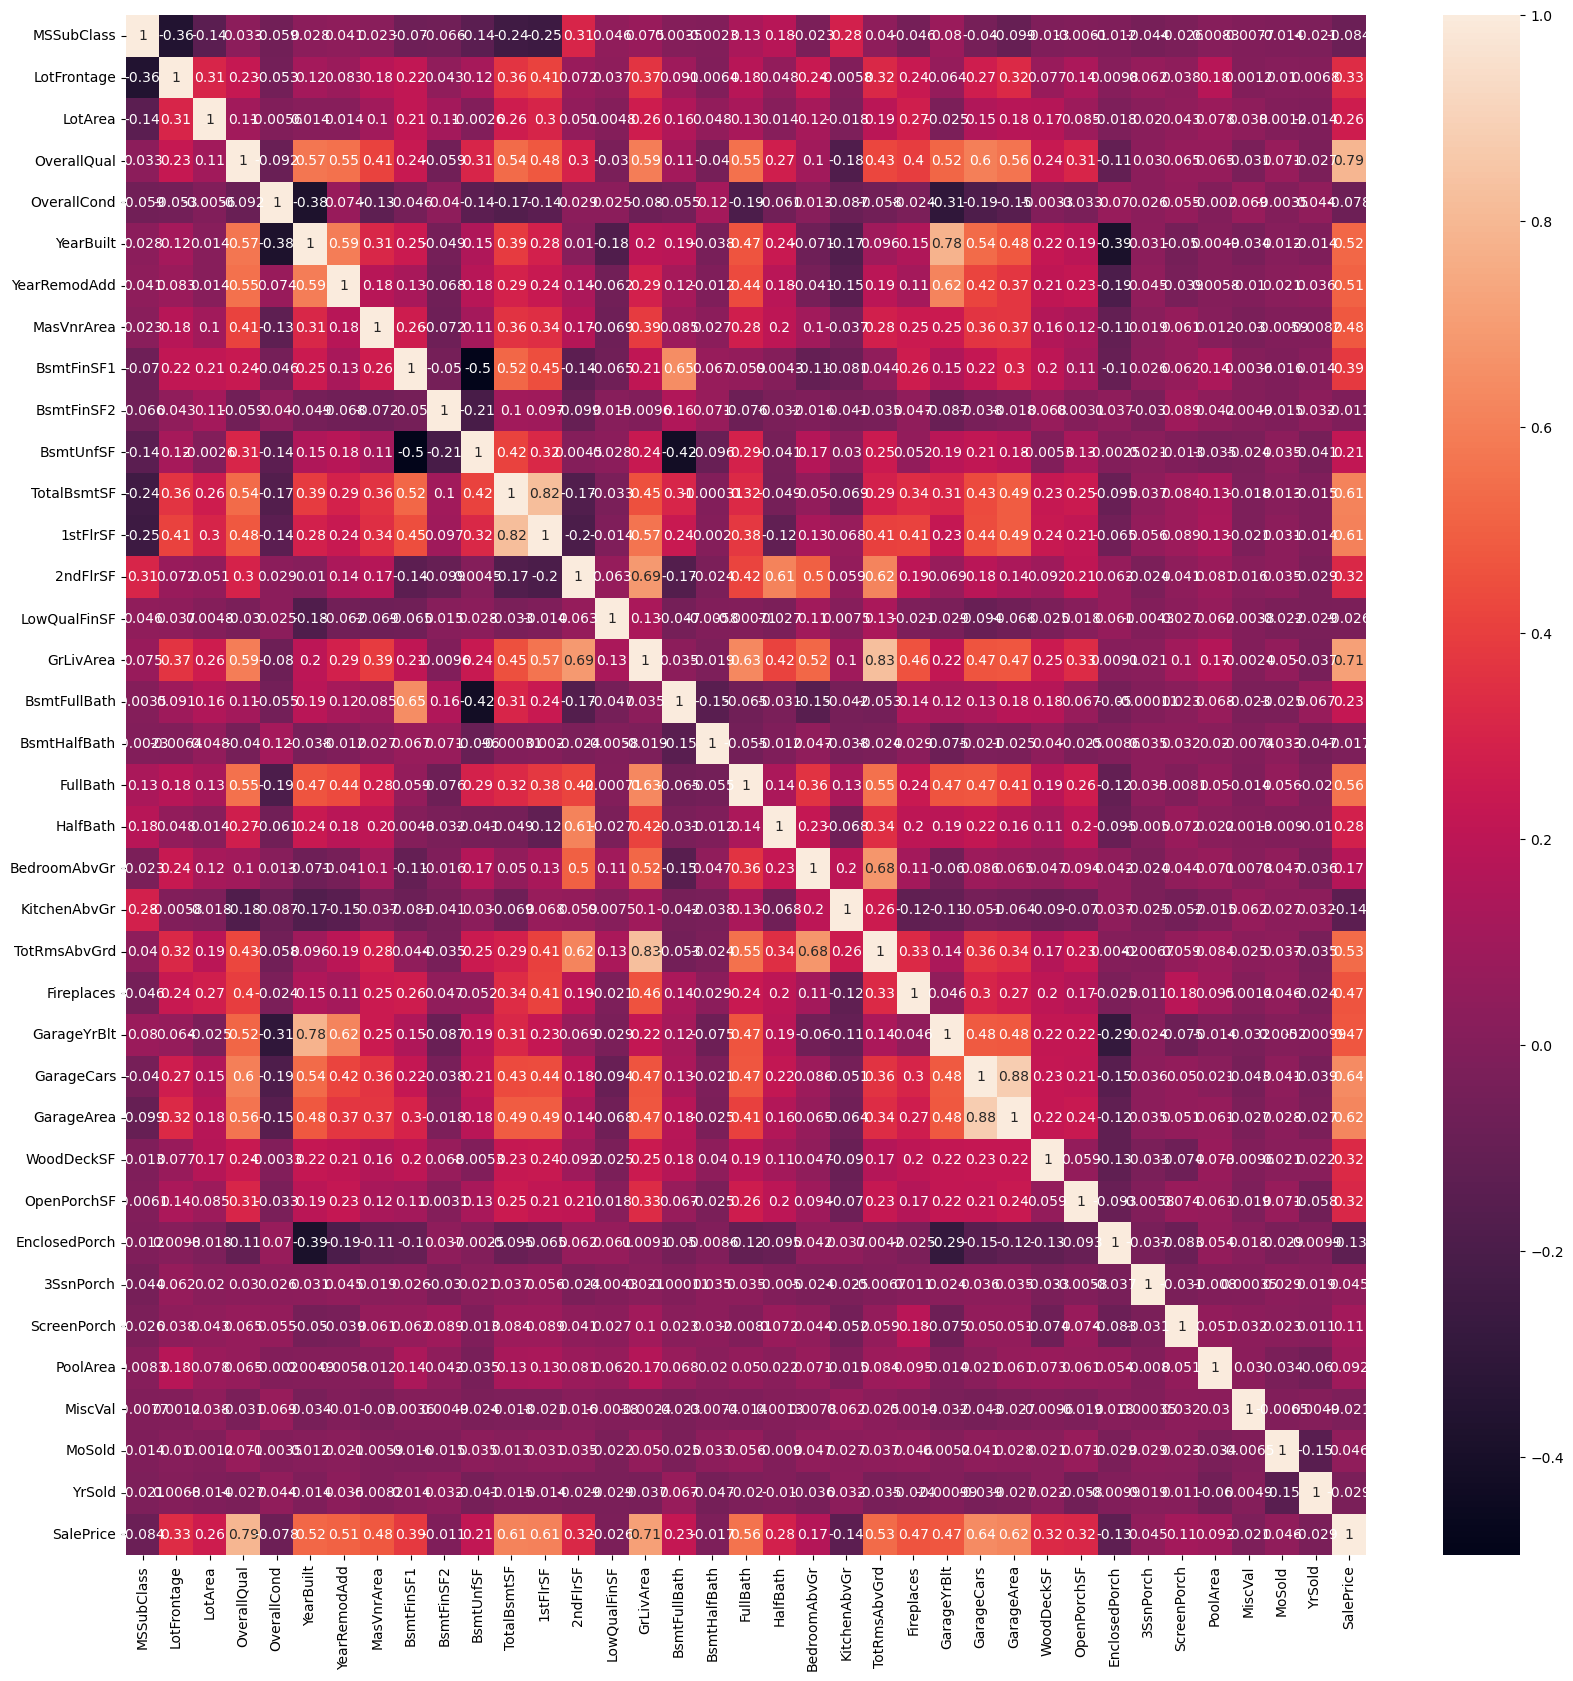

In [398]:
#our target variable is SalePrice, check the co releation of this variable with other numerical variable
plt.figure(figsize=(20,20))
sns.heatmap(ds.corr(),annot=True)
plt.show()

In [399]:
#the target variable salePrice is strongly co related with OverallQual,YearBuilt,YearRemodAdd,BsmtUnfSF,TotalBsmtSF,1stFlrSF,
#GrLivArea, FullBath,TotRmsAbvGrd,  GarageCars, GarageArea, 

In [400]:
#checking the relation of data with catagorical variables
#get catagorical column names
total_cols = ds.columns
numeric_cols = ds._get_numeric_data().columns
cat_cols = list(set(total_cols) - set(numeric_cols))

In [401]:
cat_cols

['KitchenQual',
 'BsmtFinType1',
 'ExterCond',
 'HouseStyle',
 'MSZoning',
 'Foundation',
 'MasVnrType',
 'BsmtExposure',
 'GarageQual',
 'GarageCond',
 'Functional',
 'Utilities',
 'RoofStyle',
 'BsmtCond',
 'Heating',
 'Electrical',
 'Street',
 'Condition1',
 'GarageType',
 'LotConfig',
 'LandContour',
 'FireplaceQu',
 'SaleCondition',
 'LandSlope',
 'Exterior1st',
 'RoofMatl',
 'BsmtQual',
 'LotShape',
 'PavedDrive',
 'BldgType',
 'ExterQual',
 'BsmtFinType2',
 'Exterior2nd',
 'Neighborhood',
 'SaleType',
 'GarageFinish',
 'CentralAir',
 'Condition2',
 'HeatingQC']

In [ ]:
plt.figure(figsize=(40,40))
col_id = 1;
for idx in cat_cols:
    plt.subplot(8,5,col_id)
    sns.boxplot(x=cat_cols[col_id - 1],y='SalePrice',data=ds)
    col_id = col_id + 1
plt.show()

In [ ]:
#observations. House Price depends on following things
#Type of Foundation, LandContour, RoofMetal, ExterQual, GarageFinish ,BsmtFinType1, MasVnrType, Utilities, Street,FirePlaceQu,
#BsmtQual, BsmtFinType2, CentralAir, ExterCond, BsmtExposure, Condition1, SaleCondition, LotSHape, Condition2, HouseStyle
#GarageQual, BsmtCond, GarageType, PavedDrive, HeatingQC, MSZoning, GarageCond, Heating, LotConfig, BldgType, SaleType

In [ ]:
#Removed the Columns which are not usefull in doing analysis

In [ ]:
required_cols = ['Foundation', 'LandContour', 'RoofMetal', 'ExterQual', 'GarageFinish' ,'BsmtFinType1', 'MasVnrType', 
                 'Utilities', 'Street','FirePlaceQu','BsmtQual', 'BsmtFinType2', 'CentralAir', 'ExterCond', 'BsmtExposure', 
                 'Condition1', 'SaleCondition', 'LotShape', 'Condition2', 'HouseStyle','GarageQual', 'BsmtCond', 'GarageType',
                 'PavedDrive', 'HeatingQC', 'MSZoning', 'GarageCond', 'Heating', 'LotConfig', 
                 'BldgType', 'SaleType','OverallQual','YearBuilt','YearRemodAdd','BsmtUnfSF','TotalBsmtSF','1stFlrSF',
                 'GrLivArea', 'FullBath','TotRmsAbvGrd',  'GarageCars', 'GarageArea','KitchenQual','Exterior2nd','Neighborhood'
                ,'Exterior1st','SalePrice','MasVnrArea','Fireplaces','Electrical','GarageYrBlt','FireplaceQu','RoofMatl',
                 'OverallCond','MSSubClass']

total_cols = ds.columns
cols_to_be_removed = list(set(total_cols) - set(required_cols))
cols_to_be_removed

In [ ]:
ds = ds.drop(columns=cols_to_be_removed,axis=1)

In [ ]:
#converting some nmerical columns to catagorical columns
ds.info()

In [ ]:
ds['MSSubClass'] = ds['MSSubClass'].map({20 : '1-STORY 1946 & NEWER ALL STYLES',
        30: '1-STORY 1945 & OLDER',
        40: '1-STORY W/FINISHED ATTIC ALL AGES',
        45: '1-1/2 STORY - UNFINISHED ALL AGES',
        50 : '1-1/2 STORY FINISHED ALL AGES',
        60 : '2-STORY 1946 & NEWER',
        70 : '2-STORY 1945 & OLDER',
        75 : '2-1/2 STORY ALL AGES',
        80 : 'SPLIT OR MULTI-LEVEL',
        85 : 'SPLIT FOYER',
        90 : 'DUPLEX - ALL STYLES AND AGES',
       120 : '1-STORY PUD (Planned Unit Development) - 1946 & NEWER',
       150 : '1-1/2 STORY PUD - ALL AGES',
       160 : '2-STORY PUD - 1946 & NEWER',
       180 : 'PUD - MULTILEVEL - INCL SPLIT LEV/FOYER',
       190 : '2 FAMILY CONVERSION - ALL STYLES AND AGES'})
ds.head()

In [ ]:
ds['OverallQual'] = ds['OverallQual'].map({10 : 'Very Excellent',
       9 : 'Excellent',
       8 : 'Very Good',
       7 : 'Good',
       6 : 'Above Average',
       5 : 'Average',
       4 : 'Below Average',
       3 : 'Fair',
       2 : 'Poor',
       1 : 'Very Poor'})
ds.head()

In [ ]:
ds['OverallCond'] = ds['OverallCond'].map({10 : 'Very Excellent',
       9 : 'Excellent',
       8 : 'Very Good',
       7 : 'Good',
       6 : 'Above Average',
       5 : 'Average',
       4 : 'Below Average',
       3 : 'Fair',
       2 : 'Poor',
       1 : 'Very Poor'})
ds.head()

In [ ]:
ds.info()

In [ ]:
#creation of dummy variables for catagorical variables
total_cols = ds.columns
numeric_cols = ds._get_numeric_data().columns
cat_cols = list(set(total_cols) - set(numeric_cols))

for idx in cat_cols:
    dummy_var = pd.get_dummies(ds[idx],drop_first=True)
    ds = pd.concat([ds,dummy_var],axis=1)
    ds = ds.drop(idx,axis = 1)

In [ ]:
ds.head()

In [ ]:
#scaling of numeric variables
scaler = MinMaxScaler()
num_vars = ['SalePrice','MasVnrArea']
ds[num_vars] = scaler.fit_transform(ds[num_vars])
ds.head()

In [ ]:
#splitting train & test data sets
y = ds.pop('SalePrice')
X = ds
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.7,random_state=100)  

In [ ]:
#performing Linear Regression
lm = LinearRegression()
lm.fit(X_train, y_train)

In [ ]:
print(lm.intercept_)
print(lm.coef_)

In [ ]:
#evualating linear regression model
y_pred_train = lm.predict(X_train)
y_pred_test = lm.predict(X_test)

metric_lm = []
r2_train = r2_score(y_train, y_pred_train)
print("R2 Score train : ", r2_train)
metric_lm.append(r2_train)

r2_test = r2_score(y_test,y_pred_test)
print("R2 Score test : ", r2_test)
metric_lm.append(r2_test)

rss_train = np.sum(np.square(y_train - y_pred_train))
print("RSS Score train : ", r2_test)
metric_lm.append(rss_train)

rss_test = np.sum(np.square(y_test - y_pred_test))
print("RSS Score test : ", rss_test)
metric_lm.append(rss_test)

mse_train = mean_squared_error(y_train,y_pred_train)
print("Mean Squared Error Train : ", mse_train)
metric_lm.append(mse_train**0.5)

mse_test = mean_squared_error(y_test,y_pred_test)
print("Mean Squared Error Test : ", mse_test)
metric_lm.append(mse_test**0.5)

#there is some difference between r2 score of training and testing set, we will try the same in ridge regression

In [ ]:
#ridge regression
params = {'alpha': [0.0001,0.001,0.01,0.05,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0,2.0,3.0,
                    4.0,5.0,6.0,7.0,8.0,9.0,10.0,20,50,100,500,1000]}
ridge = Ridge()
folds = 5
model_cv = GridSearchCV(estimator=ridge,param_grid=params,scoring='neg_mean_absolute_error',cv=folds,return_train_score=True,
                       verbose=1)
model_cv.fit(X_train,y_train)

In [ ]:
#get the best value of lambda (alpha)
print(model_cv.best_params_)

In [ ]:
#fit the ridge regression model with alpha = 20
ridge = Ridge(alpha=20)
ridge.fit(X_train,y_train)

In [ ]:
print(ridge.intercept_)
print(ridge.coef_)

In [ ]:
#evaluation of ridge regression model
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

metric_ridge = []
r2_train = r2_score(y_train, y_pred_train)
print("R2 Score train : ", r2_train)
metric_ridge.append(r2_train)

r2_test = r2_score(y_test,y_pred_test)
print("R2 Score test : ", r2_test)
metric_ridge.append(r2_test)

rss_train = np.sum(np.square(y_train - y_pred_train))
print("RSS Score train : ", r2_test)
metric_ridge.append(rss_train)

rss_test = np.sum(np.square(y_test - y_pred_test))
print("RSS Score test : ", rss_test)
metric_ridge.append(rss_test)

mse_train = mean_squared_error(y_train,y_pred_train)
print("Mean Squared Error Train : ", mse_train)
metric_ridge.append(mse_train**0.5)

mse_test = mean_squared_error(y_test,y_pred_test)
print("Mean Squared Error Test : ", mse_test)
metric_ridge.append(mse_test**0.5)

#the R2 Score has been redused little compared to linear regression, but there is not much difference between R2 scores of
#training data set & test data set. We will try the same for lasso regression.

In [ ]:
#lasso regression
lasso = Lasso()
folds = 5
model_cv = GridSearchCV(estimator=lasso,param_grid=params,scoring='neg_mean_absolute_error',cv=folds,return_train_score=True,
                       verbose=1)
model_cv.fit(X_train,y_train)

In [ ]:
#get the best value of lambda (alpha)
print(model_cv.best_params_)

In [ ]:
lasso = Lasso(alpha=0.0001)
lasso.fit(X_train,y_train)

In [ ]:
print(ridge.intercept_)
print(ridge.coef_)

In [ ]:
#evaluation of lasso regression model
y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metric_lasso = []
r2_train = r2_score(y_train, y_pred_train)
print("R2 Score train : ", r2_train)
metric_lasso.append(r2_train)

r2_test = r2_score(y_test,y_pred_test)
print("R2 Score test : ", r2_test)
metric_lasso.append(r2_test)

rss_train = np.sum(np.square(y_train - y_pred_train))
print("RSS Score train : ", r2_test)
metric_lasso.append(rss_train)

rss_test = np.sum(np.square(y_test - y_pred_test))
print("RSS Score test : ", rss_test)
metric_lasso.append(rss_test)

mse_train = mean_squared_error(y_train,y_pred_train)
print("Mean Squared Error Train : ", mse_train)
metric_lasso.append(mse_train**0.5)

mse_test = mean_squared_error(y_test,y_pred_test)
print("Mean Squared Error Test : ", mse_test)
metric_lasso.append(mse_test**0.5)

In [ ]:
# Observing the results from linear,ridge & lasso regression, Ridge Regression has been performed well, since there is no much
# difference between R2 Score of training & testing sets. Also the R2 score obtained by Ridge Regression is 0.8 which is 
# a good score. We can conclude that using ridge regression model helps to better predicting house price for any given data.

In [ ]:
# the best lambda value obtained by Ridge Regression is : 20
# the best lambda value obtained by Lasso Regression is : 0.0001

In [ ]:
#get the model co efficeints
betas = pd.DataFrame(index=X.columns)
betas.rows = X.columns
betas['Ridge'] = ridge.coef_
betas = betas.sort_values('Ridge')
betas.tail(20)
#these are top 20 fields that affects price of house and their co-efficients

In [ ]:
#the lambda value obtained for Ridge Regression is 20 & Lambda value obtained for Lasso Regression is 0.0001